In [109]:
#importing the libraries and features from the packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import nltk
import string
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score 

# Algorithms
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
     

In [110]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving spam_ham_dataset.csv to spam_ham_dataset (1).csv


In [111]:
#Read the CSV file
df = pd.read_csv('spam_ham_dataset.csv')

#Print the first 10 rows of data
df.head(10)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
5,2949,ham,Subject: ehronline web address change\r\nthis ...,0
6,2793,ham,Subject: spring savings certificate - take 30 ...,0
7,4185,spam,Subject: looking for medication ? we ` re the ...,1
8,2641,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...,0
9,1870,ham,"Subject: nominations for oct . 21 - 23 , 2000\...",0


In [112]:
# Drop unnecesery and empty colums
cols = [0,3]
df.drop(df.columns[cols],axis=1,inplace=True)
df.head(10)

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
5,ham,Subject: ehronline web address change\r\nthis ...
6,ham,Subject: spring savings certificate - take 30 ...
7,spam,Subject: looking for medication ? we ` re the ...
8,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...
9,ham,"Subject: nominations for oct . 21 - 23 , 2000\..."


In [113]:
#Rename columns as category and message
df.rename(columns = {'label':'Category', 'text':'Message'}, inplace = True)
df.head(10)

,Category,Message
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
5,ham,Subject: ehronline web address change\r\nthis ...
6,ham,Subject: spring savings certificate - take 30 ...
7,spam,Subject: looking for medication ? we ` re the ...
8,ham,Subject: noms / actual flow for 2 / 26\r\nwe a...
9,ham,"Subject: nominations for oct . 21 - 23 , 2000\..."


In [114]:
print(f'Dataset consist of {df.shape[0]} E-Mails.')

Dataset consist of 5171 E-Mails.


In [115]:
#Get the total number of ham and spam dataset
df['Category'].value_counts()

ham     3672
spam    1499
Name: Category, dtype: int64

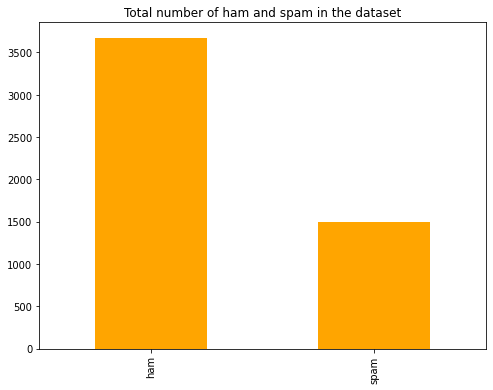

In [116]:
#As we requested the total number of hamd and spam dataset, in that section we are reciving that as a graph.
plt.figure(figsize=(8,6))

df['Category'].value_counts().plot.bar(color = ["orange","orange"])
plt.title('Total number of ham and spam in the dataset')
plt.show()

You might put another graph in here word cloud


You might put another graph in here word cloud

In [117]:
#0: Ham, 1: Spam
df['Category']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [118]:
#Show the new shape(number of row and columns)
df.shape

(5171, 2)

In [119]:
#Show the number of missing (NAN, NaN, na)data for each column
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [120]:
#Download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [121]:
from nltk.stem.snowball import stopwords
def process_text(Message):
  #1 Remove the punctuation
  #2 Remove stopwords
  #3 return a list of a clean text words

  #1
  nopunc = [char for char in Message if char not in string.punctuation]
  nopunc = ''.join(nopunc)

  #2
  clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  
  #3
  return clean_words

In [122]:
# Show the tokenization (a list of tokens also called lemmas)
df['Message'].head().apply(process_text)

0    [Subject, enron, methanol, meter, 988291, foll...
1    [Subject, hpl, nom, january, 9, 2001, see, att...
2    [Subject, neon, retreat, ho, ho, ho, around, w...
3    [Subject, photoshop, windows, office, cheap, m...
4    [Subject, indian, springs, deal, book, teco, p...
Name: Message, dtype: object

In [123]:
#Example 

message4 = 'hello world hello hello world play'
message5 = 'test test test test one hello'
print(message4)
print()

#Convert the text to a matrix of token counts
#sklearn is a machine learning library
from sklearn.feature_extraction.text import CountVectorizer
bow4 = CountVectorizer(analyzer=process_text).fit_transform([[message4], [message5]])
print(bow4)
print()

print(bow4.shape)

hello world hello hello world play

  (0, 0)	3
  (0, 4)	2
  (0, 2)	1
  (1, 0)	1
  (1, 3)	4
  (1, 1)	1

(2, 5)


In [126]:
#Convert a collection of text to a matrix of tokens
#from sklearn.feature_extraction.text import CountVectorizer
#messages_bow = CountVectorizer(analyzer=process_text).fit_transform(df['Message'])

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['Message'])
y = df['Category']

In [129]:
#Split the data into %80 training and %20 testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state= 42)

In [130]:
#Get the shape of messages_bow (5171 row of data and 50381 colums in our data set)
messages_bow.shape

(5171, 50381)

In [131]:
# Making the SVM Classifer
Classifier = SVC(kernel="linear")

In [132]:
# Training the model on the training data and labels
Classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [133]:
# Using the model to predict the labels of the test data
pred = Classifier.predict(X_train)
y_pred = Classifier.predict(X_test)

In [134]:
# Evaluating the accuracy of the model using the sklearn functions
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)


In [135]:
#Print the predictions
print(Classifier.predict(X_train))

#Print the actual values
print(y_train.values)

[1 0 0 ... 1 0 0]
[1 0 0 ... 1 0 0]


In [139]:
# random testing using randomforestclassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
cl=SVC(kernel ='linear')
cl.fit(X_train, y_train)
y_pred = cl.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred)
print(cm2)
print(classification_report(y_test,y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred) * 100)

[[921   9]
 [  5 358]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       930
           1       0.98      0.99      0.98       363

    accuracy                           0.99      1293
   macro avg       0.99      0.99      0.99      1293
weighted avg       0.99      0.99      0.99      1293

Accuracy:  98.91724671307038
